# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Authors:** Chun-Hung Yeh, Kuan Tung, Zhuoyue Wang  
**Group:** 5  
**Due date:** 08.05.2020

[iapr2020]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

In order to make reasonable hypotheses about the data, we have to first plot them and check the distributions of those classes.

In [3]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

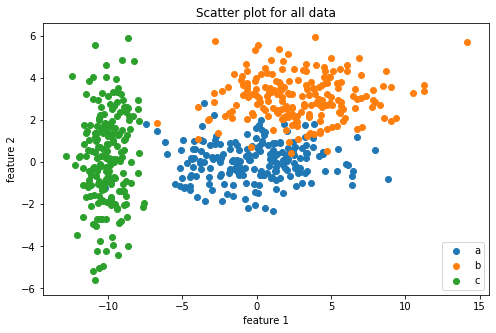

In [4]:
# plot all data
all_data = [a, b, c]
plt.figure(figsize=(8, 5))
for data in all_data:
    plt.scatter(data[:, 0], data[:, 1])
plt.title('Scatter plot for all data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['a', 'b', 'c'], loc='lower right')
plt.show()

It seems like their distribution are Gaussian. Class a and b probably have similar variances and class c has different variances.

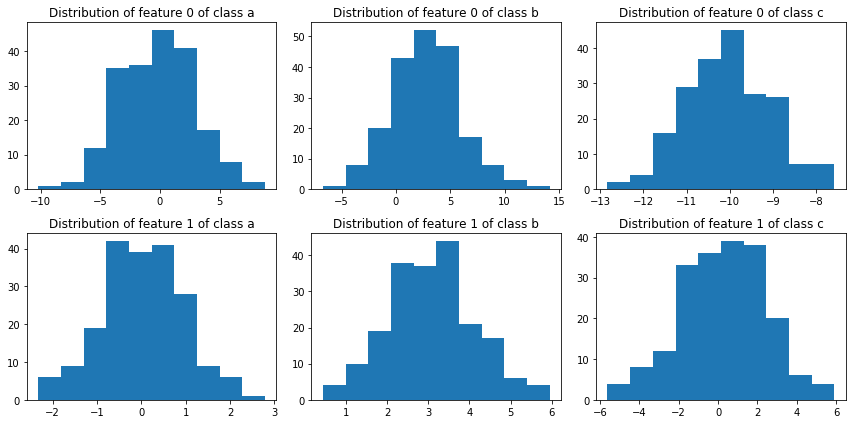

In [5]:
# plot distribution of features
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
class_names = ['a', 'b', 'c']
for fi in range(2):
    for ci in range(3):
        axes[fi, ci].hist(all_data[ci][:, fi])
        axes[fi, ci].set_title(f'Distribution of feature {fi} of class {class_names[ci]}')
fig.tight_layout()

Looking at the actual distribution of the features, we can be more confident in saying that the distributions of these classes are Gaussian.

**Our hypotheses:**  

1. The distribution of the features of these classes are Gaussian.
2. Priors are the same since we have the same number of data for each class.

We can now formulate the analytical expression of the separation curves using Bayes method.

First, we derive the general discriminant function,

$$g_i(x) = \ln(p(x|w_i)P(w_i)) = \ln p(x|w_i) + \ln P(w_i)$$
$$= -\frac{1}{2}(x - \mu_i)^T\Sigma_i^{-1}(x - \mu_i) + \ln P(w_i) + c_i$$
$$= -\frac{1}{2}x^T\Sigma_i^{-1}x + \frac{1}{2}x^T\Sigma_i^{-1}\mu_i - \frac{1}{2}\mu^T\Sigma_i^{-1}\mu_i + \frac{1}{2}\mu_i^T\Sigma_i^{-1}x + \ln P(w_i) + c_i$$

, where $\Sigma_i$ is the covariance matrix, $\mu_i$ is the mean, $P(w_i)$ is the prior and $c_i$ is the constant that will be cancelled out.

The separation curve for class a and b:

$$g_a(x) - g_b(x) = -\frac{1}{2}x^T\Sigma_a^{-1}x + \frac{1}{2}x^T\Sigma_a^{-1}\mu_a - \frac{1}{2}\mu^T\Sigma_a^{-1}\mu_a + \frac{1}{2}\mu_a^T\Sigma_a^{-1} + \frac{1}{2}x^T\Sigma_b^{-1}x - \frac{1}{2}x^T\Sigma_b^{-1}\mu_b + \frac{1}{2}\mu^T\Sigma_b^{-1}\mu_b - \frac{1}{2}\mu_b^T\Sigma_b^{-1}x = 0$$

For class b and c and class a and c, the expression will be similar, we just need to change the subscripts.

Let's calculate the estimated paramters and draw the curves.

In [6]:
means = [data.mean(axis=0).round() for data in all_data]
for i in range(3):
    print(f'Means of class {class_names[i]}: {means[i]}')

Means of class a: [-0.  0.]
Means of class b: [3. 3.]
Means of class c: [-10.   0.]


In [7]:
covs = [np.cov(data[:, 0], data[:, 1]) for data in all_data]
for i in range(3):
    print(f'Covariance of class {class_names[i]}: \n{covs[i]}')

Covariance of class a: 
[[10.02769733  0.13162336]
 [ 0.13162336  0.83932673]]
Covariance of class b: 
[[10.17034812  0.18023771]
 [ 0.18023771  1.0840038 ]]
Covariance of class c: 
[[0.97013029 0.23458112]
 [0.23458112 4.69756273]]


In [8]:
def decision_curve(x, mean_a, mean_b, cov_a, cov_b):
    g_a = (x.T - mean_a).T @ np.linalg.inv(cov_a) @ (x - mean_a)
    g_b = (x - mean_b).T @ np.linalg.inv(cov_b) @ (x - mean_b)
    return -0.5 * (g_a - g_b)

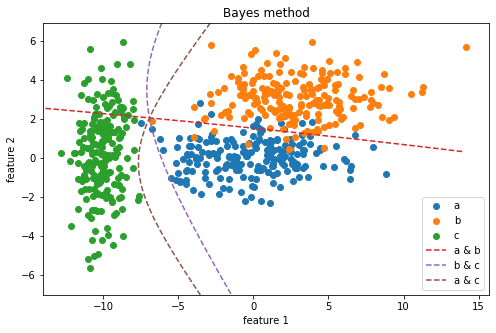

In [9]:
# plot all data and separation curves
plot_handles = []
plt.figure(figsize=(8, 5))
for idx, data in enumerate(all_data):
    tmp = plt.scatter(data[:, 0], data[:, 1], label=class_names[idx])
    plot_handles.append(tmp)

# use meshgrid to create points which will later be fed to decision_curve function
X, Y = np.meshgrid(np.arange(-14, 14, 0.1), np.arange(-7, 7, 0.1))
pairs = [(0, 1), (1, 2), (0, 2)]
colors = ['C3', 'C4', 'C5']
for idx, p in enumerate(pairs):
    # empty matrix which will saves the output of decision_curve function
    cvs = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            cv = decision_curve(point, means[p[0]], means[p[1]], covs[p[0]], covs[p[1]])
            cvs[i, j] = cv
    # use plt.contour to plot the desicion curve (g_a - g_b = 0)
    tmp = plt.contour(X, Y, cvs, 0, linestyles='dashed', colors=colors[idx])
    plot_handles.append(tmp.collections[0])

plt.title('Bayes method')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(plot_handles, ['a', 'b', 'c', 'a & b', 'b & c', 'a & c'], loc='lower right')
plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

The expression of the Mahalanobis distance is $d_m = ((x - \mu_i)^T\Sigma_i^T(x - \mu_i))^\frac{1}{2}$

In [10]:
def mahalanobis_distance(x, mean, cov):
    return np.sqrt((x - mean).T @ np.linalg.inv(cov) @ (x - mean))

In [11]:
# select a few points
selected_indices = [10, 14, 22, 32, 40, 51, 132, 152, 158, 193]
selected_a = a[selected_indices]
selected_b = b[selected_indices]

# for class a
for i in range(len(selected_indices)):
    pt = selected_a[i]
    dist_a = mahalanobis_distance(pt, means[0], covs[0])
    dist_b = mahalanobis_distance(pt, means[1], covs[1])
    class_m = 'a' if dist_a <= dist_b else 'b'
    bayes_ab = decision_curve(pt, means[0], means[1], covs[0], covs[1])
    bayes_bc = decision_curve(pt, means[1], means[2], covs[1], covs[2])
    bayes_ac = decision_curve(pt, means[0], means[2], covs[0], covs[2])
    if bayes_ab >=0 and bayes_ac >= 0:
        class_b = 'a'
    elif bayes_ab <= 0 and bayes_bc >= 0:
        class_b = 'b'
    elif bayes_bc <= 0 and bayes_ac <= 0:
        class_b = 'c'
    print(f'Index {selected_indices[i]:03d} of class a, the classification results are {class_m} for Mahalanobis distance, and {class_b} for Bayes method.')
    
print()
# for class b
for i in range(len(selected_indices)):
    pt = selected_b[i]
    dist_a = mahalanobis_distance(pt, means[0], covs[0])
    dist_b = mahalanobis_distance(pt, means[1], covs[1])
    class_m = 'a' if dist_a <= dist_b else 'b'
    bayes_ab = decision_curve(pt, means[0], means[1], covs[0], covs[1])
    bayes_bc = decision_curve(pt, means[1], means[2], covs[1], covs[2])
    bayes_ac = decision_curve(pt, means[0], means[2], covs[0], covs[2])
    if bayes_ab >=0 and bayes_ac >= 0:
        class_b = 'a'
    elif bayes_ab <= 0 and bayes_bc >= 0:
        class_b = 'b'
    elif bayes_bc <= 0 and bayes_ac <= 0:
        class_b = 'c'
    print(f'Index {selected_indices[i]:03d} of class b, the classification results are {class_m} for Mahalanobis distance, and {class_b} for Bayes method.')

Index 010 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 014 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 022 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 032 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 040 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 051 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 132 of class a, the classification results are a for Mahalanobis distance, and c for Bayes method.
Index 152 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 158 of class a, the classification results are a for Mahalanobis distance, and a for Bayes method.
Index 193 of class a, the classification results are a 

For the 20 points we selected from class a and b, the classification results of the 'complete' Bayes method and Mahalanobis distance are mostly the same.

The only difference is for index 132 of class a, from the two classes Mahalanobis distance method it's a class a, but from the 'complete' Bayes method it's a class c. Mahalanobis distance method is still a good way to do classification for this case since we are not calculating the Mahalanobis distance of class c and it's also a relatively simple method.

In the below cell, we use Mahalanobis distance method to classify all points and compare the result with Bayes method.

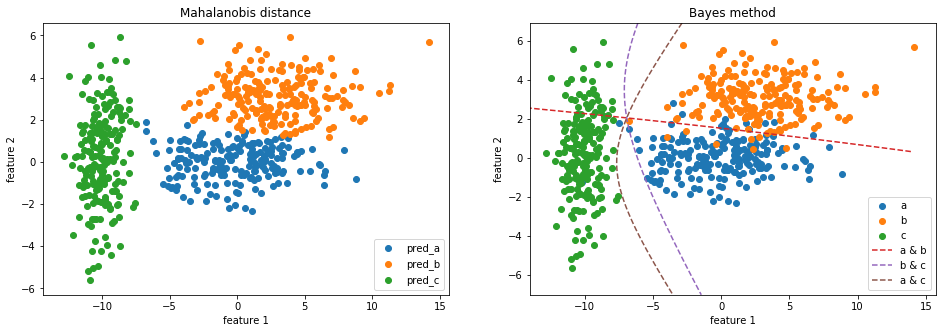

In [12]:
# save classification results using Mahalanobis distance method
m_pred_classes = []
concat_data = np.concatenate((a, b, c),axis=0)
for pt in concat_data:
    dist_a = mahalanobis_distance(pt, means[0], covs[0])
    dist_b = mahalanobis_distance(pt, means[1], covs[1])
    dist_c = mahalanobis_distance(pt, means[2], covs[2])
    dists = [dist_a, dist_b, dist_c]
    # pick the class of the smallest distance as the predicted class
    pred = dists.index(min(dists))
    m_pred_classes.append(pred)
m_pred_classes = np.array(m_pred_classes)
        
# plot the results of the two methods in one plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
pred_a_data = concat_data[m_pred_classes == 0]
pred_b_data = concat_data[m_pred_classes == 1]
pred_c_data = concat_data[m_pred_classes == 2]
all_pred_data = [pred_a_data, pred_b_data, pred_c_data]
for idx, data in enumerate(all_pred_data):
    axes[0].scatter(data[:, 0], data[:, 1], label=['pred_a', 'pred_b', 'pred_c'][idx])
axes[0].set_title('Mahalanobis distance')
axes[0].set_xlabel('feature 1')
axes[0].set_ylabel('feature 2')
axes[0].legend(loc='lower right')
    
plot_handles = []
for idx, data in enumerate(all_data):
    tmp = axes[1].scatter(data[:, 0], data[:, 1], label=class_names[idx])
    plot_handles.append(tmp)

# use meshgrid to create points which will later be fed to decision_curve function
X, Y = np.meshgrid(np.arange(-14, 14, 0.1), np.arange(-7, 7, 0.1))
pairs = [(0, 1), (1, 2), (0, 2)]
colors = ['C3', 'C4', 'C5']
for idx, p in enumerate(pairs):
    # empty matrix which will saves the output of decision_curve function
    cvs = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            cv = decision_curve(point, means[p[0]], means[p[1]], covs[p[0]], covs[p[1]])
            cvs[i, j] = cv
    # use plt.contour to plot the desicion curve (g_a - g_b = 0)
    tmp = axes[1].contour(X, Y, cvs, 0, linestyles='dashed', colors=colors[idx])
    plot_handles.append(tmp.collections[0])

axes[1].set_title('Bayes method')
axes[1].set_xlabel('feature 1')
axes[1].set_ylabel('feature 2')
axes[1].legend(plot_handles, ['a', 'b', 'c', 'a & b', 'b & c', 'a & c'], loc='lower right')
plt.show()

We can see that most of the results are the same for both methods. The only difference again is the blue point (class a) in the right figure which is closest to the green cluster (class c). We guess this is the index 132 of class a we find out in the previous part.

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [13]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [14]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

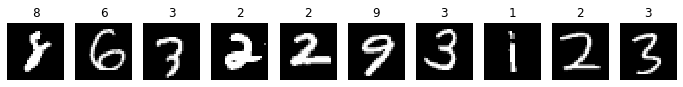

In [15]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*

In [16]:
# import packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

First we have to flatten the 2D images into 1D vectors. We also normalize the pixel values to the range [0, 1] because it will help the MLP better converges. We normalize them by dividing 255.

In [17]:
# flatten and normalize images
train_images_flat = train_images.reshape(-1, 784) / 255.
test_images_flat = test_images.reshape(-1, 784) / 255.

The MLPClassifier from [scikit-learn](http://scikit-learn.org/stable/index.html) supports multi-class classification by applying Softmax as the output function. We should transform the labels into one hot encodings to fit the model. 

In [18]:
# transform labels to one hot encodings
enc = OneHotEncoder(categories='auto')
# adding an extra dimension which is required by the fit function
enc.fit(train_labels.reshape(-1, 1))
train_onehots = enc.transform(train_labels.reshape(-1, 1)).toarray()
test_onehots = enc.transform(test_labels.reshape(-1, 1)).toarray()

After the above preparations, we can train the model. It's simple to train the model using [scikit-learn](http://scikit-learn.org/stable/index.html). We just need one line to setup the model and another line to train the model. We list the parameters we set in the following,

1. Hidden layer sizes are set to 100 and 10.
2. We use [Adam](https://arxiv.org/abs/1412.6980) optimizer to update the weights.
3. Early stopping is set to avoid unnecessary training iterations. It will set aside 10% of training data as validation and show the validation accuracy when training.
4. Verbose is set to see training progress

In [19]:
# setup the classifier and train the model
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 10), random_state=1, early_stopping=True, verbose=True)
clf.fit(train_images_flat, train_onehots)

Iteration 1, loss = 2.02360705
Validation score: 0.757833
Iteration 2, loss = 0.73291112
Validation score: 0.852833
Iteration 3, loss = 0.52384313
Validation score: 0.887667
Iteration 4, loss = 0.41217546
Validation score: 0.908333
Iteration 5, loss = 0.34099570
Validation score: 0.921500
Iteration 6, loss = 0.29080837
Validation score: 0.931000
Iteration 7, loss = 0.25354544
Validation score: 0.933667
Iteration 8, loss = 0.22548691
Validation score: 0.937500
Iteration 9, loss = 0.20208302
Validation score: 0.939167
Iteration 10, loss = 0.18341170
Validation score: 0.941167
Iteration 11, loss = 0.16796751
Validation score: 0.946167
Iteration 12, loss = 0.15499394
Validation score: 0.947333
Iteration 13, loss = 0.14148898
Validation score: 0.948000
Iteration 14, loss = 0.13134405
Validation score: 0.950500
Iteration 15, loss = 0.12144941
Validation score: 0.948667
Iteration 16, loss = 0.11341499
Validation score: 0.948333
Iteration 17, loss = 0.10438461
Validation score: 0.951167
Iterat

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Finally, we can use the predict function to get the output and evaluate the performance of the model.

In [20]:
# get model output for training and testing data
pred_train_onehots = clf.predict(train_images_flat)
pred_test_onehots = clf.predict(test_images_flat)
# convert from one hot encodings back to labels
pred_train_labels = np.argmax(pred_train_onehots, axis=1)
pred_test_labels = np.argmax(pred_test_onehots, axis=1)
# calculate training and testing accuracy
train_acc = accuracy_score(train_labels, pred_train_labels)
test_acc = accuracy_score(test_labels, pred_test_labels)

print(f'Training accuracy: {train_acc}')
print(f'Testing accuracy: {test_acc}')

Training accuracy: 0.9898833333333333
Testing accuracy: 0.9625


We can get really good accuracy (96.35%) using MLP in this 10 classes classification task. It shows that MLP is able to create complex decision surfaces.